In [1]:
import pandas as pd
import seaborn as sns
import missingno as msno

In [2]:
riders = pd.read_csv("data/Riders.csv")
riders.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


In [3]:
sample = pd.read_csv("data/SampleSubmission.csv")
sample.head()

,Order_No,Time from Pickup to Arrival
0,Order_No_19248,567.0
1,Order_No_12736,4903.0
2,Order_No_768,5649.0
3,Order_No_15332,NaN
4,Order_No_21373,NaN


In [4]:
test = pd.read_csv("data/Test.csv")
test.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


In [5]:
riders.shape

(960, 5)

In [6]:
# drop duplicates (no duplicates in data)
riders = riders.drop_duplicates()

In [7]:
# rename columns
riders.rename(columns={"Rider Id":"rider_id"}, inplace=True)
riders.rename(columns={"No_Of_Orders":"no_of_orders"}, inplace=True)
riders.rename(columns={"Age":"age"}, inplace=True)
riders.rename(columns={"Average_Rating":"average_rating"}, inplace=True)
riders.rename(columns={"No_of_Ratings":"no_of_ratings"}, inplace=True)
riders.head()

,rider_id,no_of_orders,age,average_rating,no_of_ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


In [8]:
riders.dtypes

rider_id           object
no_of_orders        int64
age                 int64
average_rating    float64
no_of_ratings       int64
dtype: object

In [9]:
# reformat data under Rider_Id to only ID numbers
riders.rider_id = riders["rider_id"].str.split("Rider_Id_").str.get(1)

In [10]:
riders.head()

,rider_id,no_of_orders,age,average_rating,no_of_ratings
0,396,2946,2298,14.0,1159
1,479,360,951,13.5,176
2,648,1746,821,14.3,466
3,753,314,980,12.5,75
4,335,536,1113,13.7,156


In [11]:
# change Rider_Id type to integer
riders.loc[:, "rider_id"] = riders.rider_id.astype(int)

<AxesSubplot:>

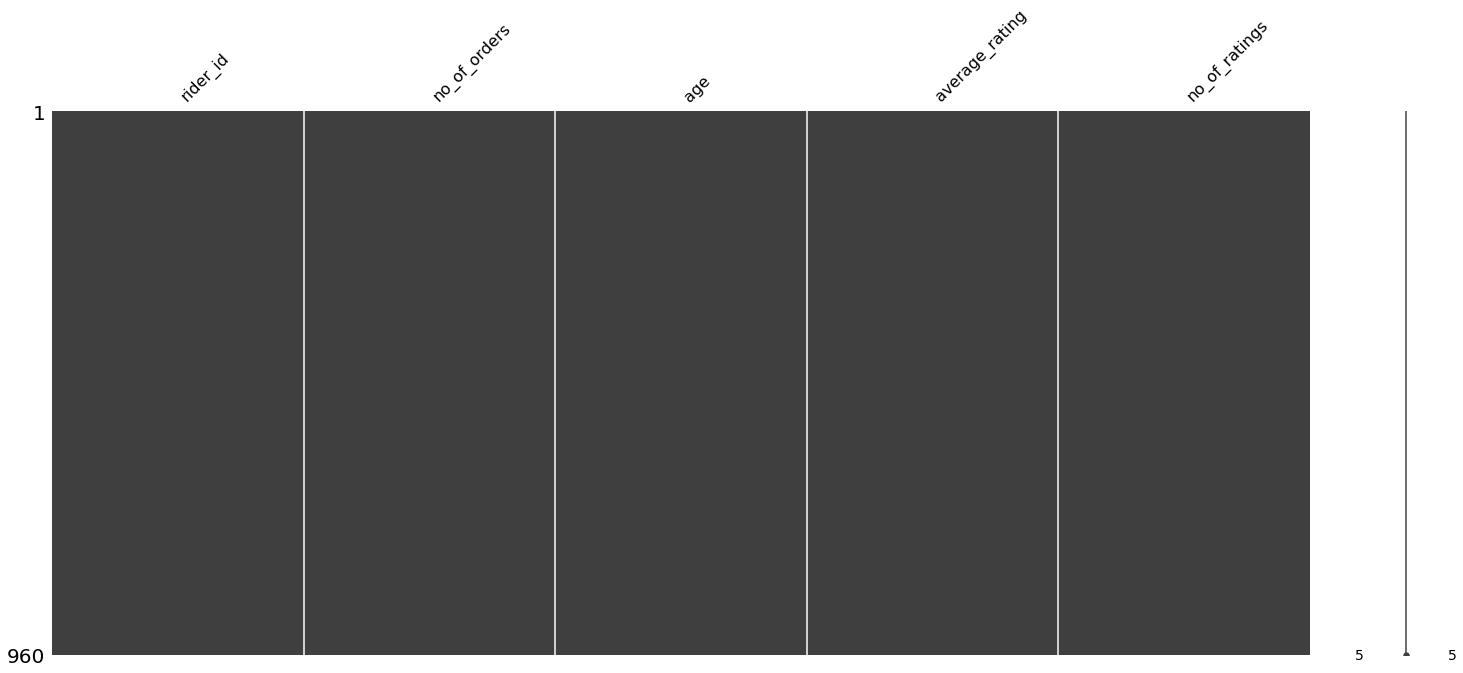

In [12]:
msno.matrix(riders)

In [13]:
# no columns to be dropped
# no columns to be filled
riders.head()

,rider_id,no_of_orders,age,average_rating,no_of_ratings
0,396,2946,2298,14.0,1159
1,479,360,951,13.5,176
2,648,1746,821,14.3,466
3,753,314,980,12.5,75
4,335,536,1113,13.7,156


In [14]:
riders.dtypes

rider_id            int64
no_of_orders        int64
age                 int64
average_rating    float64
no_of_ratings       int64
dtype: object

<AxesSubplot:xlabel='average_rating', ylabel='no_of_orders'>

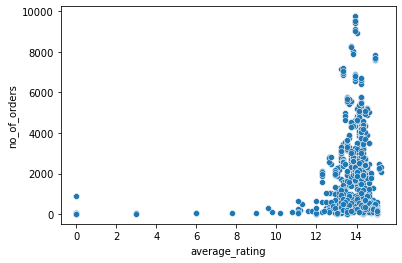

In [15]:
# Relationship between average rating and number of orders
sns.scatterplot(x="average_rating", y="no_of_orders", data=riders)

<AxesSubplot:xlabel='no_of_orders', ylabel='no_of_ratings'>

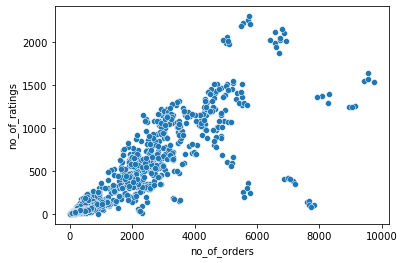

In [16]:
# Relationship between number of orders and number of ratings
sns.scatterplot(x="no_of_orders", y="no_of_ratings", data=riders)

<AxesSubplot:xlabel='age', ylabel='no_of_orders'>

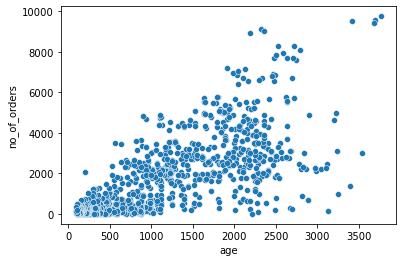

In [17]:
# Relationship between age and number of orders
sns.scatterplot(x="age", y="no_of_orders", data=riders)

In [18]:
# NOTE:
'''
The above three graphs show the relations between some of the more important columns.

In more detail:
The following shows the correlation between the columns against each other.
ie. strong/weak and positive/negative

Lastly, the cleaned data will be saved as a new pickle file.
'''

'\nThe above three graphs show the relations between some of the more important columns.\n\nIn more detail:\nThe following shows the correlation between the columns against each other.\nie. strong/weak and positive/negative\n\nLastly, the cleaned data will be saved as a new pickle file.\n'

In [19]:
correlation_matrix = riders.corr()
correlation_matrix

,rider_id,no_of_orders,age,average_rating,no_of_ratings
rider_id,1.000000,-0.021960,-0.024707,-0.017260,-0.011321
no_of_orders,-0.021960,1.000000,0.710116,0.199810,0.836781
age,-0.024707,0.710116,1.000000,0.188442,0.635270
average_rating,-0.017260,0.199810,0.188442,1.000000,0.181049
no_of_ratings,-0.011321,0.836781,0.635270,0.181049,1.000000


In [20]:
# Summary:
'''
Strong Positive:
- no_of_orders <--> age
- no_of_orders <--> no_of_ratings

Moderate Positive:
- age <--> no_of_ratings

Weak Positive:
- no_of_orders <--> average_rating
- age <--> average_rating
- average_rating <--> no_of_ratings

Weak Negative:
- rider_id <--> no_of_orders
- rider_id <--> age
- rider_id <--> average_rating
- rider_id <--> no_of_ratings


No strong-negative, moderate-negative correlations
'''

'\nStrong Positive:\n- no_of_orders <--> age\n- no_of_orders <--> no_of_ratings\n\nModerate Positive:\n- age <--> no_of_ratings\n\nWeak Positive:\n- no_of_orders <--> average_rating\n- age <--> average_rating\n- average_rating <--> no_of_ratings\n\nWeak Negative:\n- rider_id <--> no_of_orders\n- rider_id <--> age\n- rider_id <--> average_rating\n- rider_id <--> no_of_ratings\n\n\nNo strong-negative, moderate-negative correlations\n'

In [21]:
riders.to_pickle("clean-data/riders.pkl")